In [144]:
import os
import pandas as pd
from pymongo import MongoClient
from utils import decode  # Ensure you have your decode function imported
images = []

# Connect to MongoDB
mongo_connection_string = os.getenv("MONGO_CONNECTION_STRING")
mongo_db_name = os.getenv("MONGO_DB_NAME")
mongo_collection_name = os.getenv("MONGO_COLLECTION_NAME")

# Connect to MongoDB
client = MongoClient(mongo_connection_string)
db = client[mongo_db_name]
collection = db[mongo_collection_name]

# Retrieve all the images from the database
cursor = collection.find({})
for document in cursor:
    images.append(document)



#create df
df = pd.DataFrame(images)
df.to_csv('itrash_data.csv', index=False) # you can find the dataset in raw_data

In [1]:
import pandas as pd
df = pd.read_csv('itrash_data.csv')
df.head()

,_id,image,date,time,predicted,real,person_thrown,qr_scanned
0,66e145253120393632f689b4,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:21:50,yellow,yellow,yellow,0
1,66e14bdf3120393632f689b5,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:50:41,brown,blue,brown,0
2,66e14bfd3120393632f689b6,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:51:02,blue,blue,blue,0
3,66e14c1f3120393632f689b7,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:51:37,blue,blue,blue,0
4,66e153673120393632f689b8,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,10:22:39,blue,blue,blue,0


In [2]:
#sort by date and if equal by time
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by=['date', 'time'], ascending=[True, True])
df.head()

,_id,image,date,time,predicted,real,person_thrown,qr_scanned
0,66e145253120393632f689b4,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:21:50,yellow,yellow,yellow,0
1,66e14bdf3120393632f689b5,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:50:41,brown,blue,brown,0
2,66e14bfd3120393632f689b6,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:51:02,blue,blue,blue,0
3,66e14c1f3120393632f689b7,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,09:51:37,blue,blue,blue,0
4,66e153673120393632f689b8,iVBORw0KGgoAAAANSUhEUgAAAoAAAAHgCAIAAAC6s0uzAA...,2024-09-11,10:22:39,blue,blue,blue,0


# Analysis by date

In [3]:
# 2024-09-11 - day 1
# 2024-09-12 - day 2
# 2024-09-13 - day 3
# 2024-09-16 - day 4
# 2024-09-17 - day 5
df_day1 = df[df['date'] == '2024-09-17']
df_day2 = df[df['date'] == '2024-09-12']
df_day3 = df[df['date'] == '2024-09-13']
df_day4 = df[df['date'] == '2024-09-16']
df_day5 = df[df['date'] == '2024-09-17']


In [4]:
# create column called day and assign the day number to each dataframe
df_day1['day'] = 1
df_day2['day'] = 2
df_day3['day'] = 3
df_day4['day'] = 4
df_day5['day'] = 5

/tmp/ipykernel_9179/3207468770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day1['day'] = 1
/tmp/ipykernel_9179/3207468770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day2['day'] = 2
/tmp/ipykernel_9179/3207468770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [5]:
df_day1.columns

Index(['_id', 'image', 'date', 'time', 'predicted', 'real', 'person_thrown',
       'qr_scanned', 'day'],
      dtype='object')

In [6]:
df = pd.concat([df_day1, df_day2, df_day3, df_day4, df_day5])
df = df.reset_index(drop=True)
# drop _id and image columns
df = df.drop(columns=['_id', 'image', "date"])
df.head()

,time,predicted,real,person_thrown,qr_scanned,day
0,08:21:04,yellow,yellow,NaN,0,1
1,08:48:05,blue,blue,blue,0,1
2,08:55:42,blue,blue,blue,0,1
3,10:46:05,yellow,yellow,NaN,0,1
4,12:28:06,brown,brown,brown,0,1


In [7]:
df.shape

(79, 6)

In [8]:
#df.to_csv('raw_itrash.csv', index=False)

In [9]:
#sustitute nan with "nonthrown" in person_thrown
df['person_thrown'] = df['person_thrown'].fillna("nonthrown")
df["predicted"] = df["predicted"].fillna("nonpredicted")
df["real"] = df["real"].fillna("nonclassified")

In [10]:
# take the percentage of null in person_thrown
df['person_thrown'].isnull().mean()

np.float64(0.0)

In [11]:
#take the rows where person_thrown is not null
df_thrown = df[df['person_thrown'] != "nonthrown"]
df_thrown


,time,predicted,real,person_thrown,qr_scanned,day
1,08:48:05,blue,blue,blue,0,1
2,08:55:42,blue,blue,blue,0,1
4,12:28:06,brown,brown,brown,0,1
6,13:26:29,yellow,yellow,yellow,0,1
7,13:27:03,yellow,yellow,blue,0,1
...,...,...,...,...,...,...
74,13:27:03,yellow,yellow,blue,0,5
75,13:27:13,yellow,yellow,blue,0,5
76,13:27:24,yellow,yellow,yellow,0,5
77,15:19:12,brown,yellow,brown,0,5


In [12]:
#create a new column which is 1 if person_thrown and real has the same string and 0 otherwise
df_thrown['thrown_real'] = df_thrown['person_thrown'] == df_thrown['real']
df_thrown['thrown_predited'] = df_thrown['person_thrown'] == df_thrown['predicted']
df_thrown['predicted_real'] = df_thrown['predicted'] == df_thrown['real']
# replace True with 1 and False with 0
df_thrown['thrown_real'] = df_thrown['thrown_real'].astype(int)
df_thrown['thrown_predited'] = df_thrown['thrown_predited'].astype(int)
df_thrown['predicted_real'] = df_thrown['predicted_real'].astype(int)

#df_thrown

/tmp/ipykernel_9179/3787043675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thrown['thrown_real'] = df_thrown['person_thrown'] == df_thrown['real']
/tmp/ipykernel_9179/3787043675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thrown['thrown_predited'] = df_thrown['person_thrown'] == df_thrown['predicted']
/tmp/ipykernel_9179/3787043675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [13]:
df_thrown

,time,predicted,real,person_thrown,qr_scanned,day,thrown_real,thrown_predited,predicted_real
1,08:48:05,blue,blue,blue,0,1,1,1,1
2,08:55:42,blue,blue,blue,0,1,1,1,1
4,12:28:06,brown,brown,brown,0,1,1,1,1
6,13:26:29,yellow,yellow,yellow,0,1,1,1,1
7,13:27:03,yellow,yellow,blue,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
74,13:27:03,yellow,yellow,blue,0,5,0,0,1
75,13:27:13,yellow,yellow,blue,0,5,0,0,1
76,13:27:24,yellow,yellow,yellow,0,5,1,1,1
77,15:19:12,brown,yellow,brown,0,5,0,1,0


In [14]:
df_thrown["real"].value_counts()

real
yellow    36
blue      17
brown     14
Name: count, dtype: int64

In [15]:
df_thrown["predicted"].value_counts()

predicted
yellow    32
brown     21
blue      14
Name: count, dtype: int64

In [16]:
# groupby day and count rows
df_thrown.groupby('day').count()

,time,predicted,real,person_thrown,qr_scanned,thrown_real,thrown_predited,predicted_real
day,,,,,,,,
1,9,9,9,9,9,9,9,9
2,17,17,17,17,17,17,17,17
3,17,17,17,17,17,17,17,17
4,15,15,15,15,15,15,15,15
5,9,9,9,9,9,9,9,9


In [17]:
#groupby day and take the mean of thrown_real
df_thrown[["day", "thrown_real", 'thrown_predited', 'predicted_real'  ]].groupby('day').mean()

,thrown_real,thrown_predited,predicted_real
day,,,
1,0.666667,0.777778,0.888889
2,0.529412,0.705882,0.823529
3,0.823529,0.764706,0.705882
4,0.466667,0.466667,0.866667
5,0.666667,0.777778,0.888889


In [18]:
#calculate ratio of correct predictions
df_thrown['thrown_real'].mean()

np.float64(0.6268656716417911)

In [19]:
df_thrown['thrown_predited'].mean()

np.float64(0.6865671641791045)

In [20]:
df_thrown['predicted_real'].mean()

np.float64(0.8208955223880597)

In [21]:
# GROUPBY DAY AND GET HOW MANY QR SCANNED
df_thrown[["day", "qr_scanned"]].groupby('day').sum()

,qr_scanned
day,
1,0
2,2
3,2
4,0
5,0


# Get N for each color each day

In [22]:
df_thrown.real.unique(), df_thrown.predicted.unique()

(array(['blue', 'brown', 'yellow'], dtype=object),
 array(['blue', 'brown', 'yellow'], dtype=object))

In [23]:
#get yellow, blue and brown counts for each day
df_thrown.groupby('day').apply(lambda x: x['predicted'].value_counts())

/tmp/ipykernel_9179/2879380328.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_thrown.groupby('day').apply(lambda x: x['predicted'].value_counts())


day  predicted
1    yellow        4
     brown         3
     blue          2
2    yellow       12
     blue          3
     brown         2
3    brown         8
     yellow        5
     blue          4
4    yellow        7
     brown         5
     blue          3
5    yellow        4
     brown         3
     blue          2
Name: count, dtype: int64

In [24]:
#get yellow, blue and brown counts for each day
df_thrown.groupby('day').apply(lambda x: x['real'].value_counts())

/tmp/ipykernel_9179/2753731640.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_thrown.groupby('day').apply(lambda x: x['real'].value_counts())


day  real  
1    yellow     5
     blue       2
     brown      2
2    yellow    11
     blue       5
     brown      1
3    blue       7
     yellow     6
     brown      4
4    yellow     9
     brown      5
     blue       1
5    yellow     5
     blue       2
     brown      2
Name: count, dtype: int64

In [25]:
#get yellow, blue and brown counts for each day
df_thrown.groupby('day').apply(lambda x: x['person_thrown'].value_counts())

/tmp/ipykernel_9179/1485725711.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_thrown.groupby('day').apply(lambda x: x['person_thrown'].value_counts())


day  person_thrown
1    blue             4
     brown            3
     yellow           2
2    yellow           9
     brown            7
     blue             1
3    blue             8
     yellow           5
     brown            4
4    yellow           7
     blue             7
     brown            1
5    blue             4
     brown            3
     yellow           2
Name: count, dtype: int64

In [26]:
df_thrown["predicted"].value_counts()

predicted
yellow    32
brown     21
blue      14
Name: count, dtype: int64

In [27]:
df_thrown["real"].value_counts()

real
yellow    36
blue      17
brown     14
Name: count, dtype: int64

# How good our model predicts?( Pred vs Real )

In [28]:
# new column called 'correct' to check if the predicted value is correct
import numpy as np
df['pred_vs_real'] = np.where(df['real'] == df['predicted'], 1, 0)

In [29]:
#calculate mean of correct values
mean_correct = df['pred_vs_real'].mean()
mean_correct

np.float64(0.8227848101265823)

In [30]:
# calculate the mean correct for each day
df.groupby('day')['pred_vs_real'].mean()

day
1    0.916667
2    0.761905
3    0.722222
4    0.875000
5    0.916667
Name: pred_vs_real, dtype: float64

# How good people follow instructions ( Pred vs Thrown)

In [31]:
# new column called 'pred_vs_thrown' to check if the predicted value is correct
import numpy as np
df_thrown['pred_vs_thrown'] = np.where(df_thrown['predicted'] == df_thrown['person_thrown'], 1, 0)

/tmp/ipykernel_9179/1748703870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thrown['pred_vs_thrown'] = np.where(df_thrown['predicted'] == df_thrown['person_thrown'], 1, 0)


In [32]:
#calculate mean of correct values
mean_correct = df_thrown['pred_vs_thrown'].mean()
mean_correct

np.float64(0.6865671641791045)

In [33]:
# calculate the mean correct for each day
df_thrown.groupby('day')['pred_vs_thrown'].mean()

day
1    0.777778
2    0.705882
3    0.764706
4    0.466667
5    0.777778
Name: pred_vs_thrown, dtype: float64

# How good people recycle with the system ( Real vs Thrown)

In [34]:
# new column called 'real_vs_thrown' to check if the predicted value is correct
import numpy as np
df_thrown['real_vs_thrown'] = np.where(df_thrown['real'] == df_thrown['person_thrown'], 1, 0)

/tmp/ipykernel_9179/672672625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_thrown['real_vs_thrown'] = np.where(df_thrown['real'] == df_thrown['person_thrown'], 1, 0)


In [35]:
#calculate mean of correct values
mean_correct = df_thrown['real_vs_thrown'].mean()
mean_correct

np.float64(0.6268656716417911)

In [36]:
# calculate the mean correct for each day
df_thrown.groupby('day')['real_vs_thrown'].mean()

day
1    0.666667
2    0.529412
3    0.823529
4    0.466667
5    0.666667
Name: real_vs_thrown, dtype: float64

# Type I Type II Error

In [37]:
df_thrown.columns

Index(['time', 'predicted', 'real', 'person_thrown', 'qr_scanned', 'day',
       'thrown_real', 'thrown_predited', 'predicted_real', 'pred_vs_thrown',
       'real_vs_thrown'],
      dtype='object')

## Pred vs Real

- Type I Error for yellow:  When the predicted value is "yellow", but the actual value is not "yellow".
- Type II Error for yellow: When the real value is "yellow", but the predicted value is not "yellow".

In [38]:
# Type I Error for yellow: When the predicted value is "yellow", but the actual value is not "yellow".
type_i_error_yellow = df_thrown[(df_thrown['predicted'] == 'yellow') & (df_thrown['real'] != 'yellow')]
type_i_error_blue = df_thrown[(df_thrown['predicted'] == 'blue') & (df_thrown['real'] != 'blue')]
type_i_error_brown = df_thrown[(df_thrown['predicted'] == 'brown') & (df_thrown['real'] != 'brown')]

In [39]:
#Type II Error for yellow: When the real value is "yellow", but the predicted value is not "yellow".
type_ii_error_yellow = df_thrown[(df_thrown['real'] == 'yellow') & (df_thrown['predicted'] != 'yellow')]
type_ii_error_blue = df_thrown[(df_thrown['real'] == 'blue') & (df_thrown['predicted'] != 'blue')]
type_ii_error_brown = df_thrown[(df_thrown['real'] == 'brown') & (df_thrown['predicted'] != 'brown')]

In [40]:
# Type I error Yellow
type_i_error_yellow.groupby('day').size()

day
2    2
dtype: int64

In [41]:
# Type I error Blue
type_i_error_blue.groupby('day').size()

day
3    1
4    2
dtype: int64

In [42]:
#Type I error Brown
type_i_error_brown.groupby('day').size()

day
1    1
2    1
3    4
5    1
dtype: int64

In [43]:
# Type II error Yellow
type_ii_error_yellow.groupby('day').size()

day
1    1
2    1
3    1
4    2
5    1
dtype: int64

In [44]:
# Type II error Blue
type_ii_error_blue.groupby('day').size()

day
2    2
3    4
dtype: int64

In [45]:
#type II error Brown
type_ii_error_brown.groupby('day').size()

Series([], dtype: int64)

## Real vs Thrown

- Type I Error for yellow:  When the thrown value is "yellow", but the real value is not "yellow".
- Type II Error for yellow: When the real value is "yellow", but the thrown value is not "yellow".

In [46]:
# Type I Error for yellow: When the person_thrown value is "yellow", but the actual value is not "yellow".
type_i_error_yellow = df_thrown[(df_thrown['real'] == 'yellow') & (df_thrown['person_thrown'] != 'yellow')]
type_i_error_blue = df_thrown[(df_thrown['real'] == 'blue') & (df_thrown['person_thrown'] != 'blue')]
type_i_error_brown = df_thrown[(df_thrown['real'] == 'brown') & (df_thrown['person_thrown'] != 'brown')]

In [47]:
#Type II Error for yellow: When the real value is "yellow", but the thrown value is not "yellow".
type_ii_error_yellow = df_thrown[(df_thrown['person_thrown'] == 'yellow') & (df_thrown['real'] != 'yellow')]
type_ii_error_blue = df_thrown[(df_thrown['person_thrown'] == 'blue') & (df_thrown['real'] != 'blue')]
type_ii_error_brown = df_thrown[(df_thrown['person_thrown'] == 'brown') & (df_thrown['real'] != 'brown')]

In [48]:
#type I error Yellow
type_i_error_yellow.groupby('day').size()

day
1    3
2    4
3    1
4    4
5    3
dtype: int64

In [49]:
#type I error Blue
type_i_error_blue.groupby('day').size()

day
2    4
3    1
dtype: int64

In [50]:
#type I error Brown
type_i_error_brown.groupby('day').size()


day
3    1
4    4
dtype: int64

In [51]:
#type II error Yellow
type_ii_error_yellow.groupby('day').size()

day
2    2
4    2
dtype: int64

In [52]:
#type II error Blue
type_ii_error_blue.groupby('day').size()

day
1    2
3    2
4    6
5    2
dtype: int64

In [53]:
#type II error Brown
type_ii_error_brown.groupby('day').size()

day
1    1
2    6
3    1
5    1
dtype: int64

## Pred vs Thrown

- Type I Error for yellow:  When the predicted value is "yellow", but the thrown value is not "yellow".
- Type II Error for yellow: When the thrown value is "yellow", but the predicted value is not "yellow".

In [54]:
# Type I Error for yellow: When the predicted value is "yellow", but the thrown value is not "yellow".
type_i_error_yellow = df_thrown[(df_thrown['predicted'] == 'yellow') & (df_thrown['person_thrown'] != 'yellow')]
type_i_error_blue = df_thrown[(df_thrown['predicted'] == 'blue') & (df_thrown['person_thrown'] != 'blue')]
type_i_error_brown = df_thrown[(df_thrown['predicted'] == 'brown') & (df_thrown['person_thrown'] != 'brown')]

In [55]:
#Type II Error for yellow: When the thrown value is "yellow", but the predicted value is not "yellow".
type_ii_error_yellow = df_thrown[(df_thrown['person_thrown'] == 'yellow') & (df_thrown['predicted'] != 'yellow')]
type_ii_error_blue = df_thrown[(df_thrown['person_thrown'] == 'blue') & (df_thrown['predicted'] != 'blue')]
type_ii_error_brown = df_thrown[(df_thrown['person_thrown'] == 'brown') & (df_thrown['predicted'] != 'brown')]

In [56]:
#type I error Yellow
type_i_error_yellow.groupby('day').size()

day
1    2
2    3
4    3
5    2
dtype: int64

In [57]:
#type I error Blue
type_i_error_blue.groupby('day').size()

day
2    2
4    1
dtype: int64

In [58]:
#type I error Brown
type_i_error_brown.groupby('day').size()


day
3    4
4    4
dtype: int64

In [59]:
#type II error Yellow
type_ii_error_yellow.groupby('day').size()

day
4    3
dtype: int64

In [60]:
#type II error Blue
type_ii_error_blue.groupby('day').size()

day
1    2
3    4
4    5
5    2
dtype: int64

In [61]:
#type II error Brown
type_ii_error_brown.groupby('day').size()

day
2    5
dtype: int64

## Pred ^ Real VS Thrown

In [62]:
df_thrown_2 = df_thrown.copy()
# take the rows where real and predicted are the same
df_thrown_2 = df_thrown_2[df_thrown_2['real'] == df_thrown_2['predicted']]
df_thrown_2.shape

(55, 11)

In [63]:
# Type I Error for yellow: When the predicted value is "yellow", but the thrown value is not "yellow".
type_i_error_yellow = df_thrown_2[(df_thrown_2['predicted'] == 'yellow') & (df_thrown_2['person_thrown'] != 'yellow')]
type_i_error_blue = df_thrown_2[(df_thrown_2['predicted'] == 'blue') & (df_thrown_2['person_thrown'] != 'blue')]
type_i_error_brown = df_thrown_2[(df_thrown_2['predicted'] == 'brown') & (df_thrown_2['person_thrown'] != 'brown')]

In [64]:
#Type II Error for yellow: When the thrown value is "yellow", but the predicted value is not "yellow".
type_ii_error_yellow = df_thrown_2[(df_thrown_2['person_thrown'] == 'yellow') & (df_thrown_2['predicted'] != 'yellow')]
type_ii_error_blue = df_thrown_2[(df_thrown_2['person_thrown'] == 'blue') & (df_thrown_2['predicted'] != 'blue')]
type_ii_error_brown = df_thrown_2[(df_thrown_2['person_thrown'] == 'brown') & (df_thrown_2['predicted'] != 'brown')]

In [65]:
#type I error Yellow
type_i_error_yellow.groupby('day').size()

day
1    2
2    3
4    3
5    2
dtype: int64

In [66]:
#type I error Blue
type_i_error_blue.groupby('day').size()

day
2    2
dtype: int64

In [67]:
#type I error Brown
type_i_error_brown.groupby('day').size()


day
3    1
4    4
dtype: int64

In [68]:
#type II error Yellow
type_ii_error_yellow.groupby('day').size()

day
4    2
dtype: int64

In [69]:
#type II error Blue
type_ii_error_blue.groupby('day').size()

day
1    2
3    1
4    5
5    2
dtype: int64

In [70]:
#type II error Brown
type_ii_error_brown.groupby('day').size()

day
2    5
dtype: int64

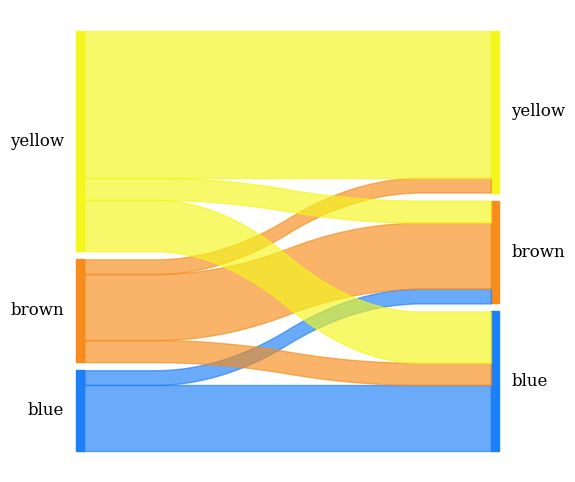

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey
colors = {
    "apple": "#f71b1b",
    "blue": "#1b7ef7",
    "yellow": "#f3f71b",
    "lime": "#12e23f",
    "brown": "#f78c1b",
    "nonthrown": "#000000",
    "nonclassified": "#000000",
}

sankey(df_thrown_2["predicted"], df_thrown_2["person_thrown"], aspect=20, colorDict=colors, fontsize=12)

## Pred v Real VS Thrown

##### Predicted

In [93]:
df_thrown_3 = df_thrown.copy()
# take the rows where real and predicted are different
df_thrown_3 = df_thrown_3[df_thrown_3['predicted'] != df_thrown_3['real']]
df_thrown_3.shape

(12, 11)

In [94]:
# Type I Error for yellow: When the predicted value is "yellow", but the thrown value is not "yellow".
type_i_error_yellow = df_thrown_3[(df_thrown_3['predicted'] == 'yellow') & (df_thrown_3['person_thrown'] != 'yellow')]
type_i_error_blue = df_thrown_3[(df_thrown_3['predicted'] == 'blue') & (df_thrown_3['person_thrown'] != 'blue')]
type_i_error_brown = df_thrown_3[(df_thrown_3['predicted'] == 'brown') & (df_thrown_3['person_thrown'] != 'brown')]

In [95]:
#Type II Error for yellow: When the thrown value is "yellow", but the predicted value is not "yellow".
type_ii_error_yellow = df_thrown_3[(df_thrown_3['person_thrown'] == 'yellow') & (df_thrown_3['predicted'] != 'yellow')]
type_ii_error_blue = df_thrown_3[(df_thrown_3['person_thrown'] == 'blue') & (df_thrown_3['predicted'] != 'blue')]
type_ii_error_brown = df_thrown_3[(df_thrown_3['person_thrown'] == 'brown') & (df_thrown_3['predicted'] != 'brown')]

In [96]:
#type I error Yellow
type_i_error_yellow.groupby('day').size()

Series([], dtype: int64)

In [97]:
#type I error Blue
type_i_error_blue.groupby('day').size()

day
4    1
dtype: int64

In [102]:
#type I error Brown
type_i_error_brown.groupby('day').size()

day
3    3
dtype: int64

In [99]:
#type II error Yellow
type_ii_error_yellow.groupby('day').size()

day
4    1
dtype: int64

In [100]:
#type II error Blue
type_ii_error_blue.groupby('day').size()

day
3    3
dtype: int64

In [101]:
#type II error Brown
type_ii_error_brown.groupby('day').size()

Series([], dtype: int64)

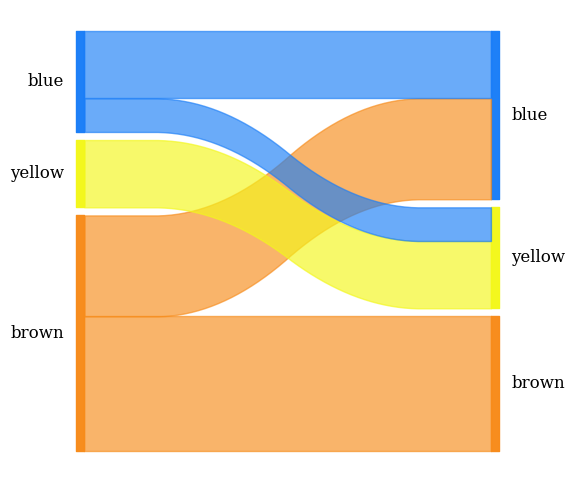

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey
colors = {
    "apple": "#f71b1b",
    "blue": "#1b7ef7",
    "yellow": "#f3f71b",
    "lime": "#12e23f",
    "brown": "#f78c1b",
    "nonthrown": "#000000",
    "nonclassified": "#000000",
}

sankey(df_thrown_3["predicted"], df_thrown_3["person_thrown"], aspect=20, colorDict=colors, fontsize=12)

##### Real

In [103]:
df_thrown_3 = df_thrown.copy()
# take the rows where real and predicted are different
df_thrown_3 = df_thrown_3[df_thrown_3['predicted'] != df_thrown_3['real']]
df_thrown_3.shape

(12, 11)

In [105]:
# Type I Error for yellow: When the predicted value is "yellow", but the thrown value is not "yellow".
type_i_error_yellow = df_thrown_3[(df_thrown_3['real'] == 'yellow') & (df_thrown_3['person_thrown'] != 'yellow')]
type_i_error_blue = df_thrown_3[(df_thrown_3['real'] == 'blue') & (df_thrown_3['person_thrown'] != 'blue')]
type_i_error_brown = df_thrown_3[(df_thrown_3['real'] == 'brown') & (df_thrown_3['person_thrown'] != 'brown')]

In [106]:
#Type II Error for yellow: When the thrown value is "yellow", but the real value is not "yellow".
type_ii_error_yellow = df_thrown_3[(df_thrown_3['person_thrown'] == 'yellow') & (df_thrown_3['real'] != 'yellow')]
type_ii_error_blue = df_thrown_3[(df_thrown_3['person_thrown'] == 'blue') & (df_thrown_3['real'] != 'blue')]
type_ii_error_brown = df_thrown_3[(df_thrown_3['person_thrown'] == 'brown') & (df_thrown_3['real'] != 'brown')]

In [107]:
#type I error Yellow
type_i_error_yellow.groupby('day').size()

day
1    1
2    1
3    1
4    1
5    1
dtype: int64

In [108]:
#type I error Blue
type_i_error_blue.groupby('day').size()

day
2    2
3    1
dtype: int64

In [114]:
#type I error Brown
type_i_error_brown.groupby('day').size()

Series([], dtype: int64)

In [115]:
#type II error Yellow
type_ii_error_yellow.groupby('day').size()

day
2    2
dtype: int64

In [111]:
#type II error Blue
type_ii_error_blue.groupby('day').size()

day
3    1
4    1
dtype: int64

In [112]:
#type II error Brown
type_ii_error_brown.groupby('day').size()

day
1    1
2    1
3    1
5    1
dtype: int64

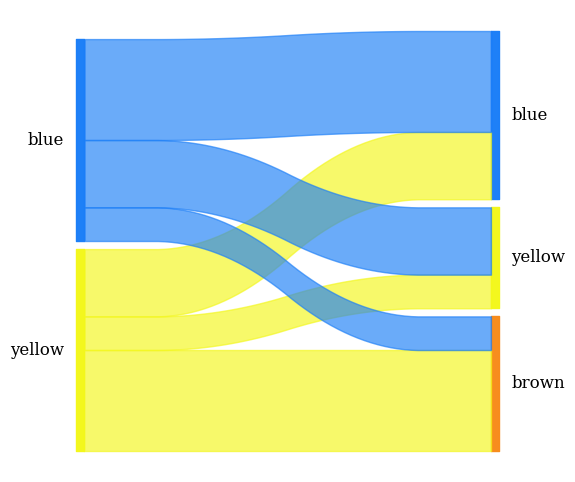

In [113]:
sankey(df_thrown_3["real"], df_thrown_3["person_thrown"], aspect=20, colorDict=colors, fontsize=12)

## Predicted vs Thrown

In [ ]:
# Type I Error for yellow: When the predicted value is "yellow", but the thrown value is not "yellow".
type_i_error_yellow = df_thrown_2[(df_thrown_2['predicted'] == 'yellow') & (df_thrown_2['person_thrown'] != 'yellow')]
type_i_error_blue = df_thrown_2[(df_thrown_2['predicted'] == 'blue') & (df_thrown_2['person_thrown'] != 'blue')]
type_i_error_brown = df_thrown_2[(df_thrown_2['predicted'] == 'brown') & (df_thrown_2['person_thrown'] != 'brown')]

In [ ]:
#Type II Error for yellow: When the thrown value is "yellow", but the predicted value is not "yellow".
type_ii_error_yellow = df_thrown_2[(df_thrown_2['person_thrown'] == 'yellow') & (df_thrown_2['predicted'] != 'yellow')]
type_ii_error_blue = df_thrown_2[(df_thrown_2['person_thrown'] == 'blue') & (df_thrown_2['predicted'] != 'blue')]
type_ii_error_brown = df_thrown_2[(df_thrown_2['person_thrown'] == 'brown') & (df_thrown_2['predicted'] != 'brown')]

In [ ]:
#type I error Yellow
type_i_error_yellow.groupby('day').size()

day
1    2
2    3
4    3
5    2
dtype: int64

In [ ]:
#type I error Blue
type_i_error_blue.groupby('day').size()

day
2    2
dtype: int64

In [ ]:
#type I error Brown
type_i_error_brown.groupby('day').size()


day
3    1
4    4
dtype: int64

In [ ]:
#type II error Yellow
type_ii_error_yellow.groupby('day').size()

day
4    2
dtype: int64

In [ ]:
#type II error Blue
type_ii_error_blue.groupby('day').size()

day
1    2
3    1
4    5
5    2
dtype: int64

In [ ]:
#type II error Brown
type_ii_error_brown.groupby('day').size()

day
2    5
dtype: int64

## QR Analysis

In [62]:
#get items that qr is different from 0
df_thrown[df_thrown['qr_scanned'] != 0]

,time,predicted,real,person_thrown,qr_scanned,day,thrown_real,thrown_predited,predicted_real,pred_vs_thrown,real_vs_thrown
32,19:17:31,yellow,yellow,yellow,2,2,1,1,1,1,1
46,15:13:16,blue,blue,blue,2,3,1,1,1,1,1


## Time analysis

In [63]:
df_thrown

,time,predicted,real,person_thrown,qr_scanned,day,thrown_real,thrown_predited,predicted_real,pred_vs_thrown,real_vs_thrown
1,08:48:05,blue,blue,blue,0,1,1,1,1,1,1
2,08:55:42,blue,blue,blue,0,1,1,1,1,1,1
4,12:28:06,brown,brown,brown,0,1,1,1,1,1,1
6,13:26:29,yellow,yellow,yellow,0,1,1,1,1,1,1
7,13:27:03,yellow,yellow,blue,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
74,13:27:03,yellow,yellow,blue,0,5,0,0,1,0,0
75,13:27:13,yellow,yellow,blue,0,5,0,0,1,0,0
76,13:27:24,yellow,yellow,yellow,0,5,1,1,1,1,1
77,15:19:12,brown,yellow,brown,0,5,0,1,0,1,0


In [64]:
time_dicc = {
    8: "08:00-09:00",
    9: "09:00-10:00",
    10: "10:00-11:00",
    11: "11:00-12:00",
    12: "12:00-13:00",
    13: "13:00-14:00",
    14: "14:00-15:00",
    15: "15:00-16:00",
    16: "16:00-17:00",
    17: "17:00-18:00",
    18: "18:00-19:00",
    19: "19:00-20:00",
    20: "20:00-21:00"
}

In [57]:
# create a plot of time 
df_thrown['time'] = pd.to_datetime(df_thrown['time'])
df_thrown['hour'] = df_thrown['time'].dt.hour
df_thrown['period'] = df_thrown['hour'].map(time_dicc)
#sort by period
df_thrown = df_thrown.sort_values(by=['period'], ascending=True)

/tmp/ipykernel_19325/40748811.py:6: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(x='period', hue='day', data=df_thrown, color='blue')


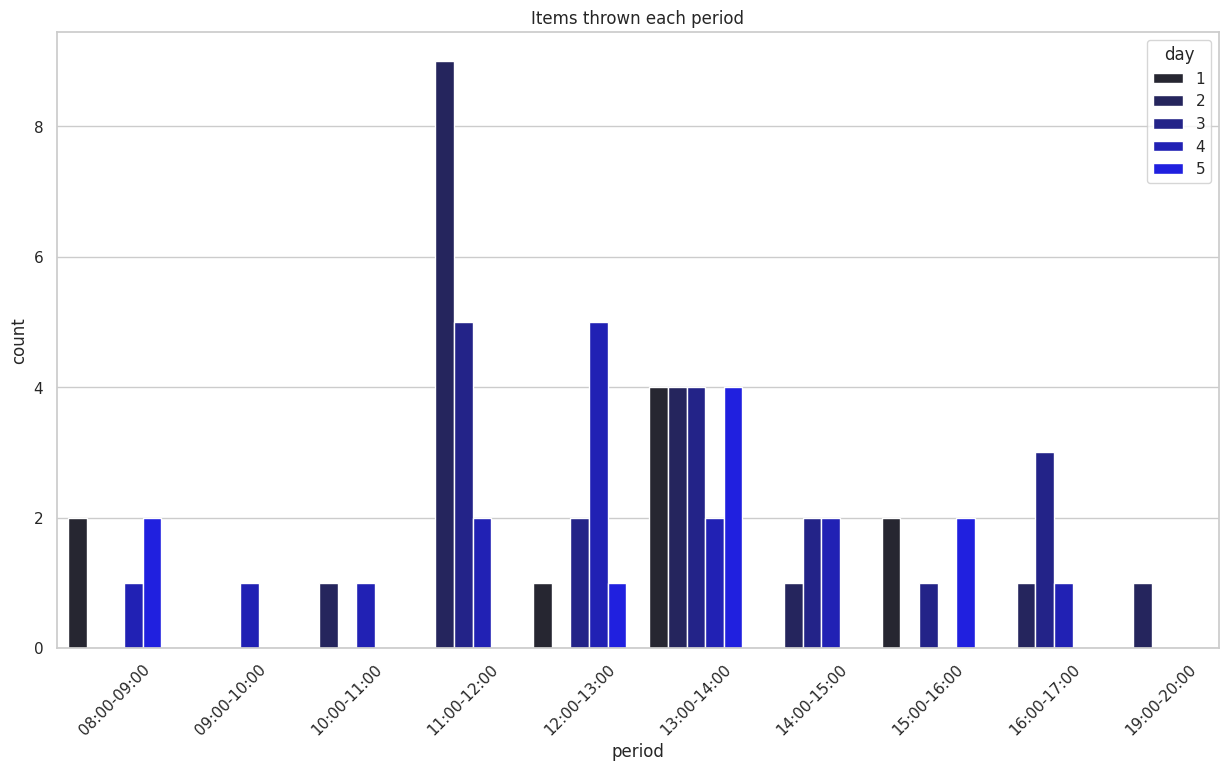

In [60]:
#graph with 5 lines one for each day showing the amount if items thrown each period
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.countplot(x='period', hue='day', data=df_thrown, color='blue')
plt.xticks(rotation=45)
plt.title('Items thrown each period')
plt.show()

## Density Analysis

In [203]:
density_dicc = {
    "yellow": 1,
    "blue": 2,
    "brown": 3
}
df_density = df_thrown[['person_thrown', 'period', 'day']]

In [204]:
df_density["density"] = df_density["person_thrown"].map(density_dicc)

/tmp/ipykernel_19325/4247695661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_density["density"] = df_density["person_thrown"].map(density_dicc)


In [205]:
# add 2 rows one for 9:00 to 10:00 and one for 10:00 to 11:00
df_add = pd.DataFrame({'person_thrown': 'na', 'period': '09:00-10:00', 'day': 3, 'density': 3, 'blue_acc': 0, 'brown_acc': 0, 'yellow_acc': 0}, index=[0])
df_add_2 = pd.DataFrame({'person_thrown': 'na', 'period': '10:00-11:00', 'day': 3, 'density': 3, 'blue_acc': 0, 'brown_acc': 0, 'yellow_acc': 0}, index=[0])
df_add_3 = pd.DataFrame({'person_thrown': 'na', 'period': '08:00-09:00', 'day': 3, 'density': 3, 'blue_acc': 0, 'brown_acc': 0, 'yellow_acc': 0}, index=[0])
df_density = pd.concat([df_density, df_add]).reset_index(drop=True)
df_density = pd.concat([df_density, df_add_2]).reset_index(drop=True)
df_density = pd.concat([df_density, df_add_3]).reset_index(drop=True)

In [206]:
#sort by date and by period
df_density = df_density.sort_values(by=['day', 'period'], ascending=True)
df_density[df_density['day'] == 3]

,person_thrown,period,day,density,blue_acc,brown_acc,yellow_acc
69,na,08:00-09:00,3,3,0.0,0.0,0.0
67,na,09:00-10:00,3,3,0.0,0.0,0.0
68,na,10:00-11:00,3,3,0.0,0.0,0.0
13,yellow,11:00-12:00,3,1,NaN,NaN,NaN
15,yellow,11:00-12:00,3,1,NaN,NaN,NaN
17,brown,11:00-12:00,3,3,NaN,NaN,NaN
18,blue,11:00-12:00,3,2,NaN,NaN,NaN
23,brown,11:00-12:00,3,3,NaN,NaN,NaN
24,brown,12:00-13:00,3,3,NaN,NaN,NaN
29,blue,12:00-13:00,3,2,NaN,NaN,NaN


In [207]:
# create a column called "blue acc", which is 1 if the person thrown is blue and 0 otherwise
df_density['blue_acc'] = np.where(df_density['person_thrown'] == 'blue', 1, 0)
# new column called 'blue_acc_', which will be the acumulated sum of blue_acc of that day
df_density['blue_acc'] = df_density.groupby('day')['blue_acc'].cumsum()

In [208]:
# for brown
df_density['brown_acc'] = np.where(df_density['person_thrown'] == 'brown', 1, 0)
df_density['brown_acc'] = df_density.groupby('day')['brown_acc'].cumsum()


In [209]:
# for yellow
df_density['yellow_acc'] = np.where(df_density['person_thrown'] == 'yellow', 1, 0)
df_density['yellow_acc'] = df_density.groupby('day')['yellow_acc'].cumsum()


In [210]:
# multiply by density
df_density['blue_acc'] = df_density['blue_acc'] 
df_density['brown_acc'] = df_density['brown_acc'] 
df_density['yellow_acc'] = df_density['yellow_acc'] 

In [211]:
# take items from day 3
df_density[df_density['day'] == 3]

,person_thrown,period,day,density,blue_acc,brown_acc,yellow_acc
69,na,08:00-09:00,3,3,0,0,0
67,na,09:00-10:00,3,3,0,0,0
68,na,10:00-11:00,3,3,0,0,0
13,yellow,11:00-12:00,3,1,0,0,1
15,yellow,11:00-12:00,3,1,0,0,2
17,brown,11:00-12:00,3,3,0,1,2
18,blue,11:00-12:00,3,2,1,1,2
23,brown,11:00-12:00,3,3,1,2,2
24,brown,12:00-13:00,3,3,1,3,2
29,blue,12:00-13:00,3,2,2,3,2


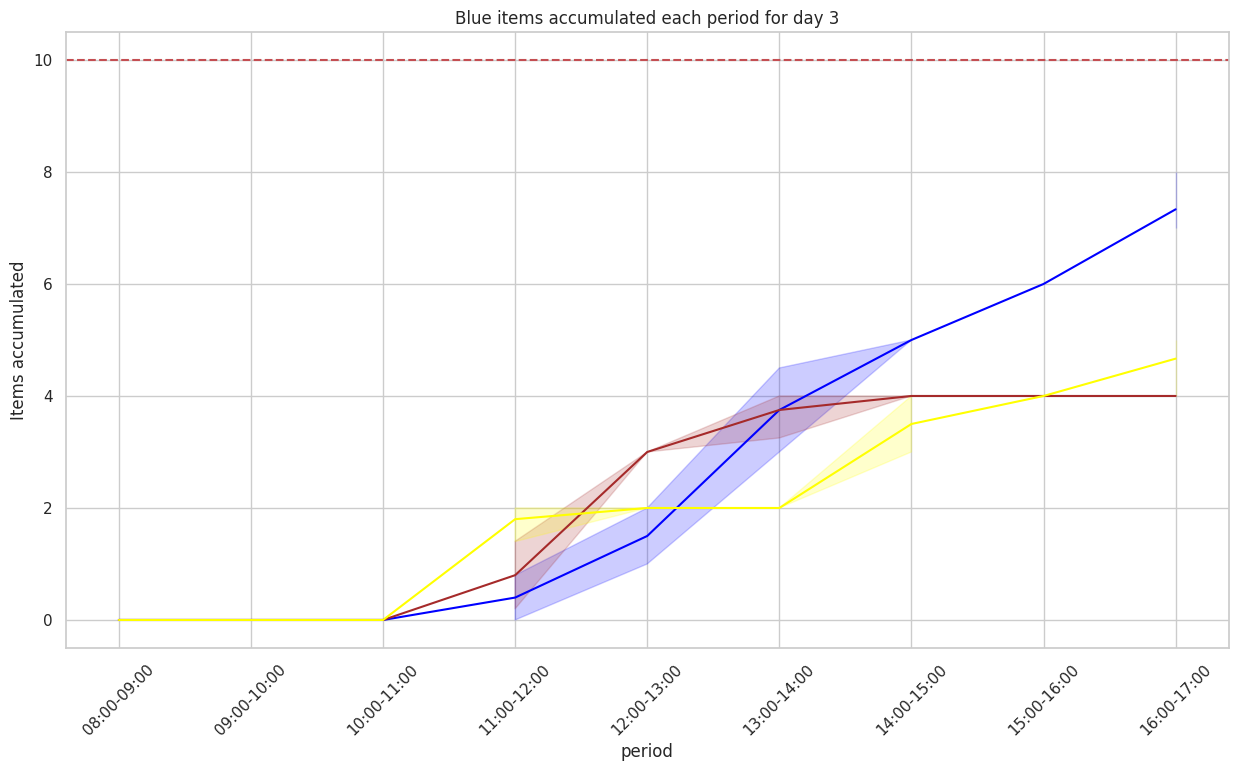

In [213]:
# create a plot of blue_acc, yellow_acc, brown_acc for each period for day 3
plt.figure(figsize=(15, 8))
sns.lineplot(x='period', y='blue_acc', data=df_density[df_density['day'] == 3], color='blue')
sns.lineplot(x='period', y='brown_acc', data=df_density[df_density['day'] == 3], color='brown')
sns.lineplot(x='period', y='yellow_acc', data=df_density[df_density['day'] == 3], color='yellow')
plt.xticks(rotation=45)
#change name of y axis
plt.ylabel('Items accumulated')
#Create a threshold line in 10
plt.axhline(y=10, color='r', linestyle='--')
plt.title('Blue items accumulated each period for day 3')
plt.show()


# Sankey viz

In [68]:
sankey_df = df_thrown[["predicted", "real", "person_thrown"]]

In [69]:
!pip install seaborn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the sankey function from the sankey module within pySankey
from pySankey.sankey import sankey

In [13]:
#null values in df
df.isnull().mean()

time             0.0
predicted        0.0
real             0.0
person_thrown    0.0
qr_scanned       0.0
day              0.0
dtype: float64

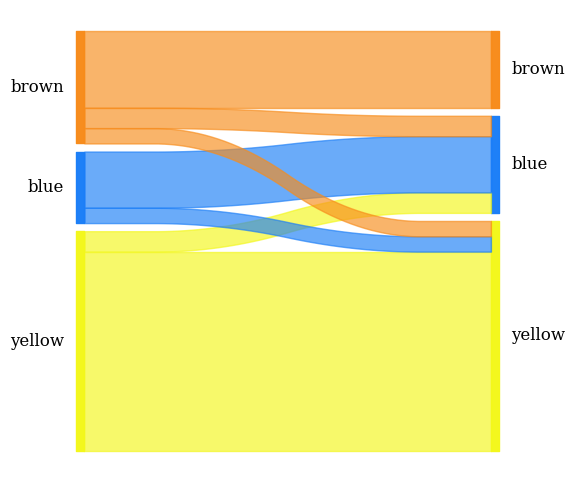

In [14]:
colors = {
    "apple": "#f71b1b",
    "blue": "#1b7ef7",
    "yellow": "#f3f71b",
    "lime": "#12e23f",
    "brown": "#f78c1b",
    "nonthrown": "#000000",
    "nonclassified": "#000000",
}

sankey(df["predicted"], df["real"], aspect=20, colorDict=colors, fontsize=12)

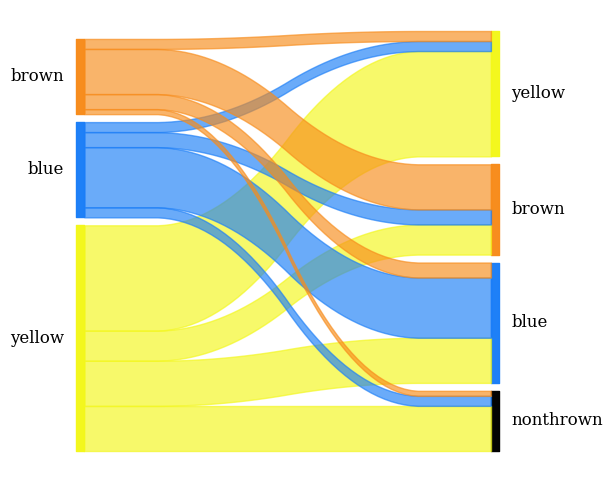

In [18]:
sankey(df["real"], df["person_thrown"], aspect=20, colorDict=colors, fontsize=12)

## Pruena

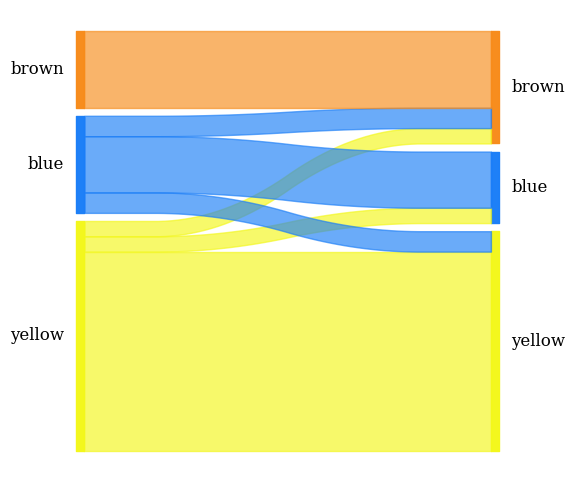

In [21]:
sankey(df["real"], df["predicted"], aspect=20, colorDict=colors, fontsize=12)

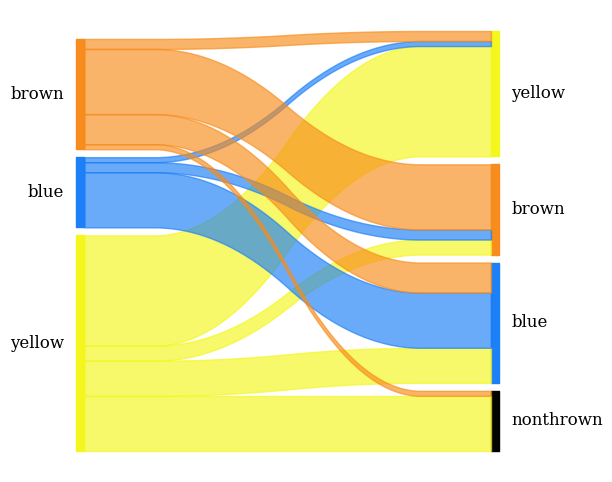

In [20]:
sankey(df["predicted"], df["person_thrown"], aspect=20, colorDict=colors, fontsize=12)

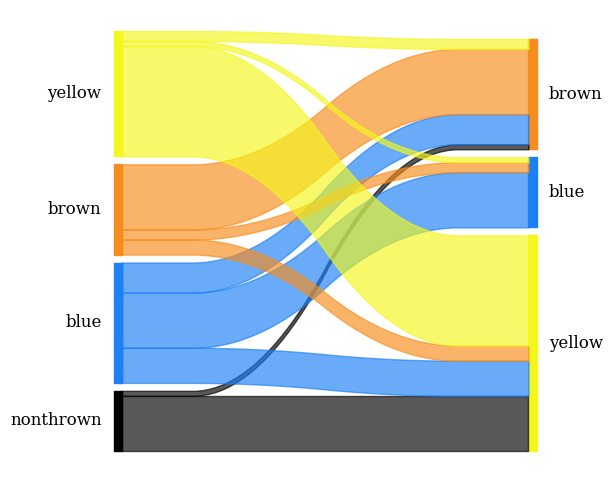

In [26]:
sankey(df["person_thrown"], df["predicted"], aspect=20, colorDict=colors, fontsize=12)